In [20]:
import matplotlib.pyplot as plt
from math import *
import random

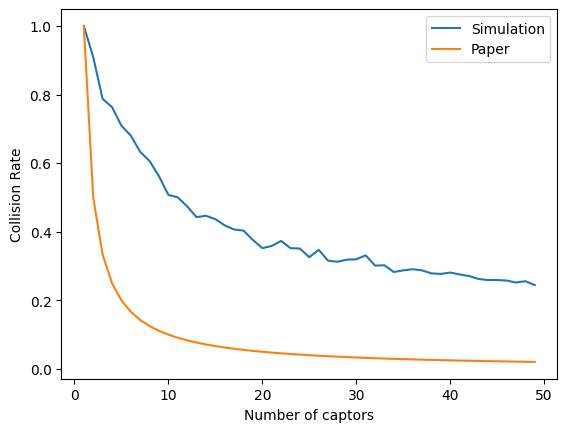

In [21]:
N_SAMPLES = 100
X_MAX     = 50

def is_free(transmitted, backoff, i):
    slot = backoff[i]
    for j in range(len(backoff)):
        if i != j and (not transmitted[j]) and backoff[j] == slot:
            return False
    return True

def simul(N, CW=8):
    """Simulate all sensors sending one packet at the same time with contention window size"""

    t = 0 # number of transmissions required
    transmitted = [False for _3 in range(N)]

    # while main packet is not transmitted
    while not transmitted[0]:
        # affect one time slot to every sensor independently
        backoff = [random.randint(0, CW) for _2 in range(N)]

        # mark successfull packets as transmitted
        for i in range(N):
            if not transmitted[i] and is_free(transmitted, backoff, i):
                transmitted[i] = True

        # increase contention window size
        t += 1
        CW *= 2
    
    return t

def simul_average(N):
    l = [simul(N) for _1 in range(N_SAMPLES)]
    return sum(l) / len(l)

X  = list(range(1, X_MAX))
Y1 = [1 / simul_average(x) for x in X] # takes a little bit of time

X2 = list(range(1, X_MAX))
Y2 = [1 / x for x in X2]

plt.plot(X, Y1, label='Simulation')
plt.plot(X2, Y2, label='Paper')
plt.xlabel('Number of captors')
plt.ylabel('Collision Rate')
plt.legend()
plt.show()